In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset link: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

car_dataset = pd.read_csv("/content/gdrive/MyDrive/Code/Car_Price_Dataset/car data.csv")
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.isnull().sum() # checking the number of missing values


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
car_dataset.Fuel_Type = encoder.fit_transform(car_dataset.Fuel_Type)
car_dataset.Seller_Type = encoder.fit_transform(car_dataset.Seller_Type)
car_dataset.Transmission = encoder.fit_transform(car_dataset.Transmission)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
car_dataset.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Owner              int64
dtype: object

In [ ]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [ ]:
theta0,theta1,theta2,theta3,theta4,theta5,theta6 = 2013.6267907, 2013.6267907, 36947.205980, 1.787375, 0.352159, 0.867110, 0.043189

In [ ]:
x1,x2,x3,x4,x5,x6 = car_dataset.Year, car_dataset.Present_Price, car_dataset.Kms_Driven, car_dataset.Fuel_Type, car_dataset.Seller_Type, car_dataset.Transmission

In [ ]:
import numpy as np

car_dataset['dist']=np.NaN
car_dataset['pred']=np.NaN


In [ ]:
for step in range(10):

  car_dataset['dist'] = theta0+theta1*x1+theta2*x2+theta3*x3+theta4*x4+theta5*x5+theta6*x6
  car_dataset['pred']=(car_dataset.pred-car_dataset.Selling_Price)

  m = car_dataset.shape[0]

  cost = (car_dataset['dist'].sum())/(2*m)

  print('\n\n')
  print('For step: ', step)
  print('Cost is : {}'.format(cost))

  step_size=0.001

  theta0 = theta0 - (step_size/m)*(np.sqrt(car_dataset['dist']).sum())
  theta1 = theta1 - (step_size/m)*((np.sqrt(car_dataset['dist'])*x1).sum())
  theta2 = theta2 - (step_size/m)*((np.sqrt(car_dataset['dist'])*x2).sum())
  theta3 = theta3 - (step_size/m)*((np.sqrt(car_dataset['dist'])*x3).sum())
  theta4 = theta4 - (step_size/m)*((np.sqrt(car_dataset['dist'])*x4).sum())
  theta5 = theta5 - (step_size/m)*((np.sqrt(car_dataset['dist'])*x5).sum())
  theta6 = theta6 - (step_size/m)*((np.sqrt(car_dataset['dist'])*x6).sum())
  print('Gradient Decent optimized thetas : ', theta0,theta1,theta2,theta3,theta4,theta5,theta6)




For step:  0
Cost is : 2202299.4643892935
Gradient Decent optimized thetas :  2011.529469900064 -2209.566910364504 36930.561980486185 -78671.5329350742 -3.381633460527211 0.14785991070851467 -1.7658631768130142



For step:  1
Cost is : -1455429424.9787683
Gradient Decent optimized thetas :  2011.529469900064 -2209.566910364504 36930.561980486185 -78671.5329350742 -3.381633460527211 0.14785991070851467 -1.7658631768130142



For step:  2
Cost is : -1455429424.9787683
Gradient Decent optimized thetas :  2011.529469900064 -2209.566910364504 36930.561980486185 -78671.5329350742 -3.381633460527211 0.14785991070851467 -1.7658631768130142



For step:  3
Cost is : -1455429424.9787683
Gradient Decent optimized thetas :  2011.529469900064 -2209.566910364504 36930.561980486185 -78671.5329350742 -3.381633460527211 0.14785991070851467 -1.7658631768130142



For step:  4
Cost is : -1455429424.9787683
Gradient Decent optimized thetas :  2011.529469900064 -2209.566910364504 36930.561980486185 -78

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


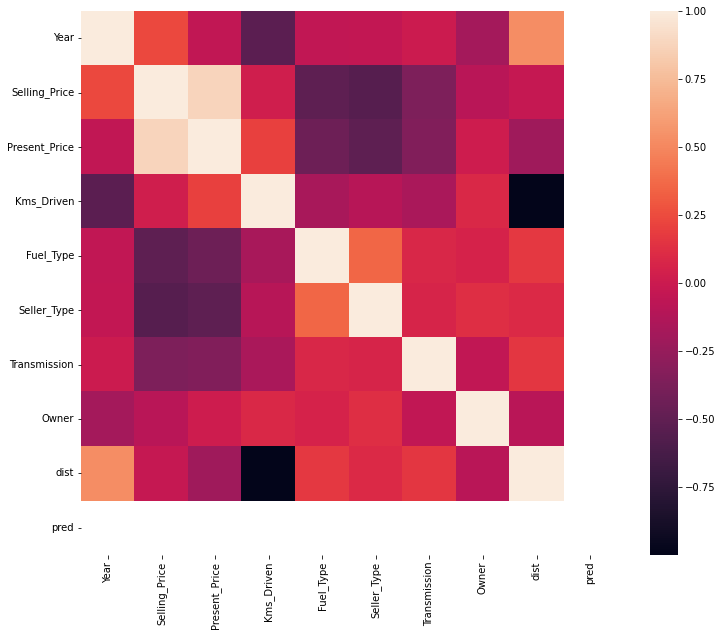

In [ ]:
import seaborn as sns 
plt.figure(figsize=(12,10))
ax = sns.heatmap(car_dataset.corr())